<a href="https://colab.research.google.com/github/mauriciohv/conception/blob/main/MCYO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

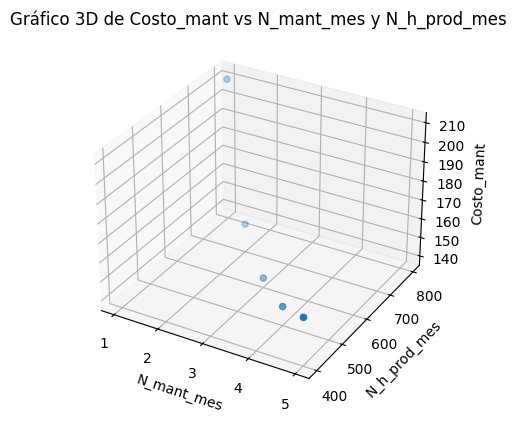

In [5]:
# Ejemplo Clase 9: Modelación de costos de mantenimiento
from pandas import read_csv
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D # Import 3D plotting tools

# importa datos de mi github
url = 'https://raw.githubusercontent.com/mauriciohv/udla/main/EIN601_C9.csv'
dataframe = read_csv(url, header=0, sep=';') # Assuming the separator is a semicolon based on common CSV formats, and the first row is the header
data = dataframe.values

# selecciona las variables de entrada y salida para el análisis
# X1=N_mant_mes (column 0), X2=N_h_prod_mes (column 1), Y=Costo_mant (column 2)
x1, x2, y = data[:, 0], data[:, 1], data[:, 2]

# genera gráfico de dispersión
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)

# agrega etiquetas y nombre al gráfico
ax.set_xlabel('N_mant_mes')
ax.set_ylabel('N_h_prod_mes')
ax.set_zlabel('Costo_mant')
ax.set_title('Gráfico 3D de Costo_mant vs N_mant_mes y N_h_prod_mes')


pyplot.show()

### Análisis de Regresión Lineal Múltiple

A continuación, se realiza un análisis de regresión lineal múltiple para modelar la relación entre `Costo_mant` (variable salida) y `N_mant_mes` y `N_h_prod_mes` (variables entrada).

In [6]:
import statsmodels.api as sm
import pandas as pd

# Carga nuevamente los datos para el análisis de regresión
url = 'https://raw.githubusercontent.com/mauriciohv/udla/main/EIN601_C9.csv'
dataframe = pd.read_csv(url, header=0, sep=';')

# Define las variables (Y) y (X)
Y = dataframe['Costo_mant']
X = dataframe[['N_mant_mes', 'N_h_prod_mes']]

# Agrega una constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajusta el modelo de regresión lineal múltiple
model = sm.OLS(Y, X).fit()

# Muestra el resumen de los resultados de la regresión
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Costo_mant   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.562
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.300
Time:                        22:26:43   Log-Likelihood:                -22.216
No. Observations:                   5   AIC:                             48.43
Df Residuals:                       3   BIC:                             47.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1954      0.632      1.893   

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Análisis de Regresión Polinomial

Debido al bajo coeficiente de determinación en el análisis de regresión lineal, se explora un modelo de regresión polinomial para capturar posibles relaciones no lineales entre las variables.

Coeficientes del modelo polinomial:
['1' 'const' 'N_mant_mes' 'N_h_prod_mes' 'const^2' 'const N_mant_mes'
 'const N_h_prod_mes' 'N_mant_mes^2' 'N_mant_mes N_h_prod_mes'
 'N_h_prod_mes^2']
[ 2.97285525e-15  0.00000000e+00  1.57685945e-04 -1.57685945e-02
  0.00000000e+00  1.57685945e-04 -1.57685945e-02  2.83832292e-03
 -1.41914942e-01 -2.40861819e-04]

Intercepto del modelo polinomial:
498.48154321106773

R-cuadrado del modelo polinomial (Grado 2): 0.946


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


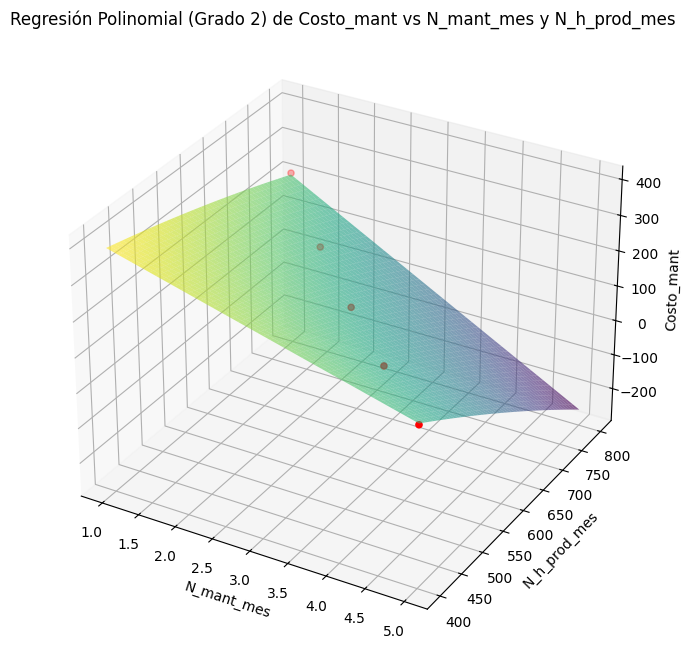

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # Import statsmodels.api


# Prepara los datos para regresión polinomial
# Se usan las mismas variables X y Y definidas anteriormente
# Y = dataframe['Costo_mant']
# X = dataframe[['N_mant_mes', 'N_h_prod_mes']]

# Crea características polinomiales.
# Se define grado 2, lo que incluye: X1^2, X2^2, y X1*X2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Ajusta el modelo de regresión lineal a las características polinomiales
model_poly = LinearRegression()
model_poly.fit(X_poly, Y)

# Muestra los coeficientes del modelo polinomial
print("Coeficientes del modelo polinomial:")
print(poly_features.get_feature_names_out())
print(model_poly.coef_)
print("\nIntercepto del modelo polinomial:")
print(model_poly.intercept_)

# Calcula el R-cuadrado del modelo polinomial
r_squared_poly = model_poly.score(X_poly, Y)
print(f"\nR-cuadrado del modelo polinomial (Grado {degree}): {r_squared_poly:.3f}")

# Para visualizar el modelo polinomial 3D se crea malla de puntos
# en el espacio de X1 y X2 y se predicen los valores de Y.

# Crea una malla para la visualización 3D
x1_surf, x2_surf = np.meshgrid(np.linspace(X['N_mant_mes'].min(), X['N_mant_mes'].max(), 50),
                              np.linspace(X['N_h_prod_mes'].min(), X['N_h_prod_mes'].max(), 50))

# Aplana las coordenadas de la malla para la predicción
x_surf = np.vstack((x1_surf.ravel(), x2_surf.ravel())).T

# Agrega columna de 1s a x_surf para que coincida con las poly_features en que se ajustó (incluyendo la constante)
x_surf = sm.add_constant(x_surf, has_constant='add')


# Transforma la malla con las mismas características polinomiales
x_surf_poly = poly_features.transform(x_surf)

# Predice los valores de Y sobre la malla
y_surf = model_poly.predict(x_surf_poly)

# Reshape los valores predichos para que coincidan con la malla
y_surf = y_surf.reshape(x1_surf.shape)

# Grafica los puntos de datos originales y la superficie de regresión polinomial
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos originales
ax.scatter(X['N_mant_mes'], X['N_h_prod_mes'], Y, color='red', marker='o', label='Datos Originales')

# Superficie de regresión polinomial
ax.plot_surface(x1_surf, x2_surf, y_surf, cmap='viridis', alpha=0.6, label=f'Modelo Polinomial (Grado {degree})')

# Etiquetas y título
ax.set_xlabel('N_mant_mes')
ax.set_ylabel('N_h_prod_mes')
ax.set_zlabel('Costo_mant')
ax.set_title(f'Regresión Polinomial (Grado {degree}) de Costo_mant vs N_mant_mes y N_h_prod_mes')

# Leyenda
# ax.legend() # no funciona directamente para plot_surface

plt.show()